In [98]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

In [235]:
outline = cv2.imread('data/new_york.png')

In [7]:
outline.shape

(572, 750, 3)

In [9]:
time=pd.read_csv('data/time_series_data.csv')
new_york=time[time['Combined_Key'].str.match('New York')]
data=new_york.iloc[0,:]
data=data[1:]

(285, 376, 3)

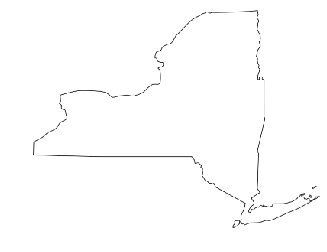

In [236]:
outline = cv2.resize(outline, (376,285))
plt.imshow(outline)
plt.axis('off')
display(outline.shape)

(285, 376)

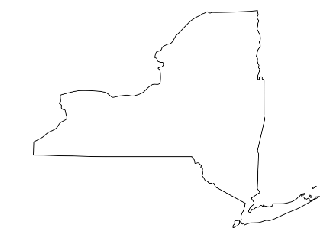

In [237]:
outline = cv2.cvtColor(outline,cv2.COLOR_RGB2GRAY)
plt.imshow(outline, cmap='gray')
plt.axis('off')
display(outline.shape)

In [238]:
out = []

In [239]:
for i in range(outline.shape[0]):
    #print(i)
    start = 0
    end = outline.shape[1] - 1
    while start < 572:
        if outline[i][start] == 255:
            out.append((i, start))
            start += 1
        else:
            break
    while end > 0:
        if outline[i][end] == 255:
            out.append((i, end))
            end -= 1
        else:
            break

In [240]:
for i in range(outline.shape[1]):
    #print(i)
    start = 0
    end = outline.shape[0] - 1
    while start < 572:
        if outline[start][i] == 255:
            out.append((start, i))
            start += 1
        else:
            break
    while end > 0:
        if outline[end][i] == 255:
            out.append((end, i))
            end -= 1
        else:
            break

In [241]:
out_set = set(out)
len(out_set)

64727

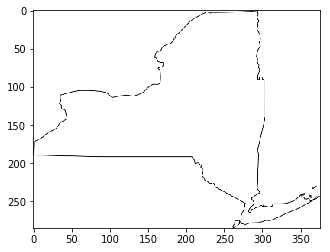

In [242]:
plt.imshow(outline, cmap='gray')

In [243]:
outline = cv2.cvtColor(outline,cv2.COLOR_GRAY2RGB)

In [244]:
for i in range(outline.shape[0]):
    for j in range(outline.shape[1]):
        if (i,j) not in out_set:
            outline[i][j] = [100, 100, 100]

(-0.5, 375.5, 284.5, -0.5)

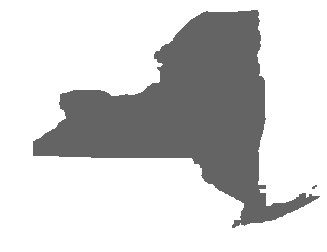

In [245]:
plt.imshow(outline)
plt.axis('off')

In [246]:
base=new_york.iloc[0,:][1:]
data = base
data = data.fillna(0)
data = data.to_list()

In [247]:
len(out_set)

64727

In [248]:
total_set = set([(i, j) for i in range(outline.shape[0]) for j in range(outline.shape[1])])

In [249]:
inner_lst = list(total_set - out_set)

In [250]:
len(inner_lst)

42433

In [255]:
imgs = []

In [256]:
for i in tqdm_notebook(range(len(data))):
    temp_img = outline.copy()
    num = int(data[i]/10)
    temp = np.random.choice(range(len(inner_lst)), num, replace=False)
    for i in temp:
        img_i, img_j = inner_lst[i]
        temp_img[img_i][img_j] = [255, 30, 30]
    imgs.append(temp_img)

In [257]:
temp_img = outline.copy()
num = int(data[130]/5)
temp = np.random.choice(range(len(inner_lst)), num, replace=False)
for i in temp:
    img_i, img_j = inner_lst[i]
    temp_img[img_i][img_j] = [255, 30, 30]

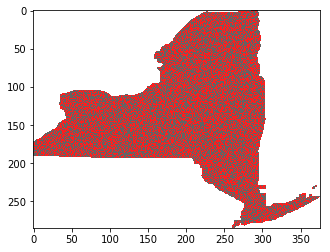

In [258]:
plt.imshow(imgs[134])

In [259]:
imgs[0].shape

(285, 376, 3)

In [263]:
import imageio
kargs = { 'duration': 0.328 }
imageio.mimsave('results/new_york.gif', imgs, **kargs)